<h2>Bibliotecas</h2>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

<h1>Transformada afines lineales</h1>


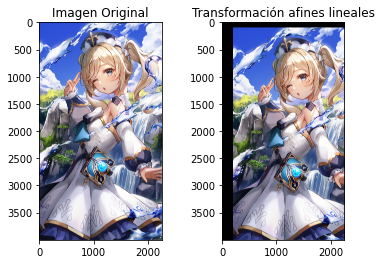

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math


def traslacion(A, delta_x, delta_y):
    """
    Esta funcion traslada una imagen X y Y pixeles
    Sintaxis: traslacion(A, delta_x, delta_y)
    Entrada:
        A -> Matriz de la imagen que se va a trasladar
        delta_x -> Cantidad de pixeles a los que se va mover la imagen en X
        delta_y -> Cantidad de pixeles a los que se va mover la imagen en y
    Salida:
        Matriz de la imagen trasladada
    """
    m, n, c = np.shape(A)
    B = np.zeros((m, n, c))
    for i in range(m):
        for j in range(n):
            new_x = i + delta_x
            new_y = j + delta_y
            if 0 < new_x < m and 0 < new_y < n:
                B[new_x, new_y, :] = A[i, j, :]
    return B


def rotacion(A, angulo):
    """
    Esta funcion rota una imagen un angulo en grados
    Sintaxis: rotacion(A, angulo)
    Entrada:
        A -> Matriz de la imagen que se va a rotar
        angulo -> Cantidad de grados que se va a rotar la imagen
    Salida:
        Matriz de la imagen rotada
    """
    angulo = math.radians(angulo)
    m, n, c = np.shape(A)
    B = np.zeros((m, n, c))
    xc, yc = m/2, n/2
    for i in range(m):
        for j in range(n):
            a0b1 = math.cos(angulo)
            a1 = math.sin(angulo)
            new_x = round(a0b1*i + a1*j + xc - a0b1*xc - a1*yc)
            new_y = round(-a1*i + a0b1*j + yc + a1*xc - a0b1*yc)
            if 0 < new_x < m and 0 < new_y < n:
                B[new_x, new_y, :] = A[i, j, :]
    return B


I_color = cv2.imread("../Imagenes/Barbara.png")
A_res = traslacion(np.array(I_color), 100, 200)
# A_res = rotacion(A_res, 45)
A_res = cv2.GaussianBlur(A_res, (5,5), 0)

cv2.imwrite("Barbara_trasladada.png", A_res)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(cv2.cvtColor(I_color, cv2.COLOR_BGR2RGB))
ax1.set_title('Imagen Original')

ax2.imshow(cv2.cvtColor(np.uint8(A_res), cv2.COLOR_BGR2RGB))
ax2.set_title('Transformación afines lineales')
plt.show()

<h1>Transformada afines no lineales</h1>

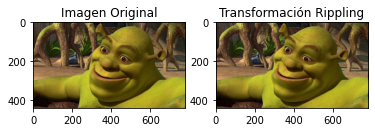

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math


def rippling(A, Lx, Ly):
    """
    Esta funcion que crea una animacion de onda en una imagen
    Sintaxis: rippling(A, Lx, Ly)
    Entrada:
        A -> Matriz de una imagen
        Lx -> Longitud en X de la onda
        Ly -> Longitud en Y de la onda
    Salida:
        Animacion del rippling de la imagen de entrada
    """
    m, n, c = np.shape(A)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    im1 = ax1.imshow(cv2.cvtColor(A, cv2.COLOR_BGR2RGB))
    ax1.set_title('Imagen Original')
    ax2.imshow(cv2.cvtColor(A, cv2.COLOR_BGR2RGB))
    ax2.set_title('Transformación Rippling')
    plt.ion()
    for k in range(5, 200, 5):
        Ax = k
        Ay = k
        B = np.zeros((m, n, c))
        for i in range(m):
            for j in range(n):
                new_x = round(i + Ax * math.sin(2*math.pi*j/Lx))
                new_y = round(j + Ay * math.sin(2*math.pi*i/Ly))
                if 0 < new_x < m and 0 < new_y < n:
                    B[new_x, new_y, :] = A[i, j, :]
        ax2.imshow(cv2.cvtColor(np.uint8(B), cv2.COLOR_BGR2RGB))
        plt.pause(1/160)
        plt.show()
    plt.ioff()


I_color = cv2.imread('../Imagenes/shrek.jpg')
rippling(I_color, 1, 100)